In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from flask import jsonify

data = pd.read_csv('framingham.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [2]:
# Feaature engineering
data.shape

(4238, 16)

In [3]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [4]:
# Drop rows with null values
data = data.dropna()

In [5]:
data.shape

(3656, 16)

In [6]:
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

<Axes: >

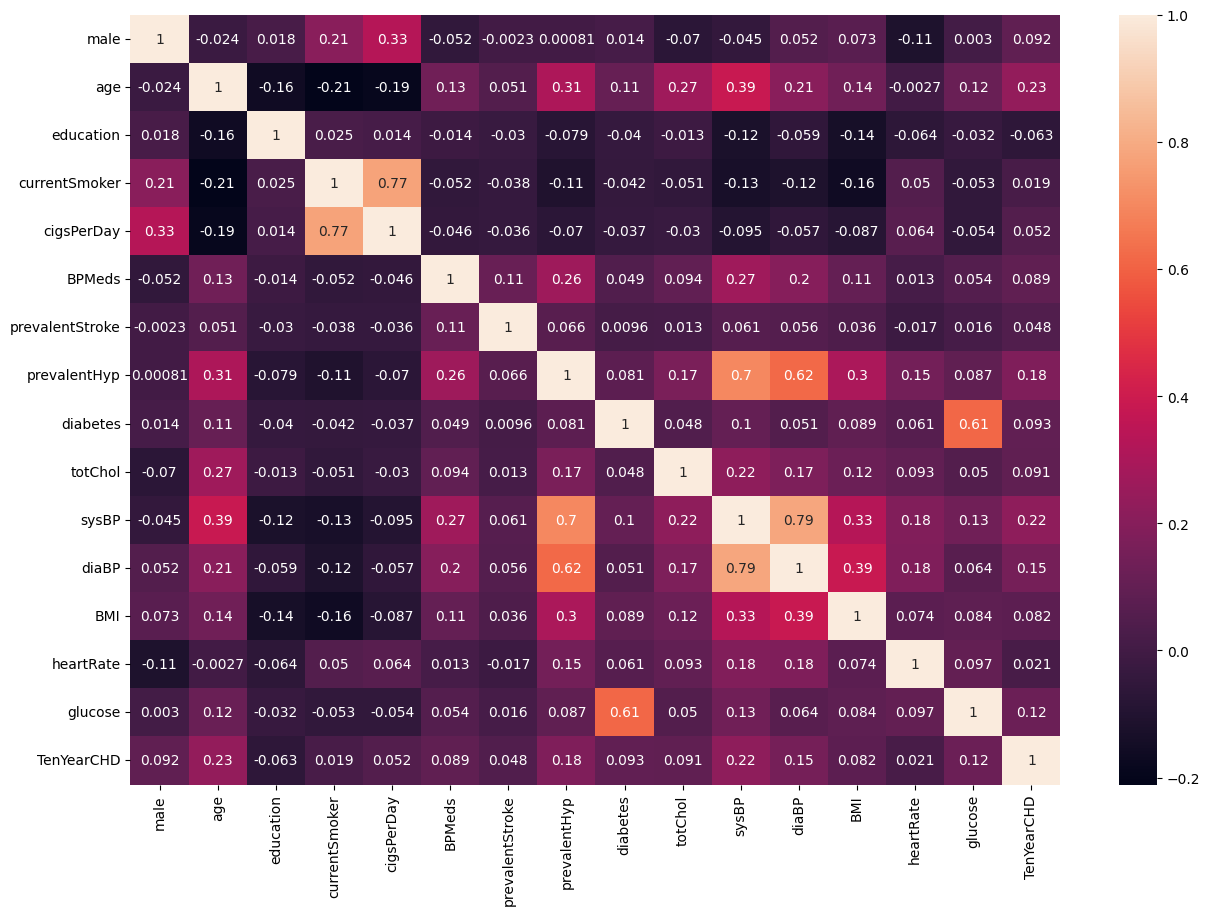

In [7]:
import seaborn as sns
corr_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True)

In [8]:
# Checking for duplicates
data.duplicated().sum()

np.int64(0)

In [9]:
data.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [10]:
data = data.dropna()

In [11]:
data.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [12]:
# Partitioning data for training
Predictors = data.drop(columns=['TenYearCHD']).columns.tolist()
x = data[Predictors]
y = data['TenYearCHD']

# Training
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=1)

In [13]:
# Fit a model
model = LogisticRegression(max_iter=2000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=2000)

In [14]:
model.predict(x_val)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [15]:
# Validating the model
model.score(x_val, y_val)

0.8579234972677595

In [16]:
cm = confusion_matrix(y_val, model.predict(x_val))
cm

array([[620,   7],
       [ 97,   8]])

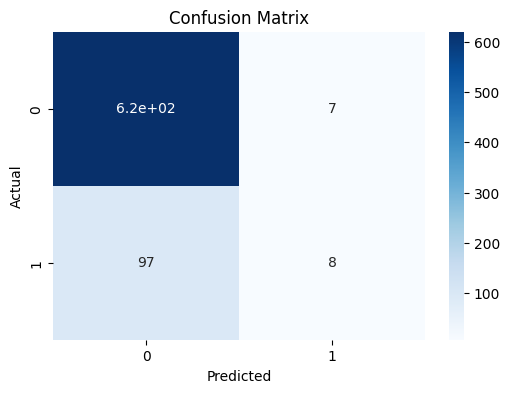

In [17]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [18]:
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'max_iter': [100, 1000, 2500, 5000],
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga']
}
lr = LogisticRegression()

In [19]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(lr, parameters, cv=5)
grid_search.fit(x_train, y_train)

c:\Users\agila\Documents\AIDI 1002\Assignment_3\Assignment_3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\agila\Documents\AIDI 1002\Assignment_3\Assignment_3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [100, 1000, 2500, 5000],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']})

In [20]:
grid_search.best_params_

{'C': 1, 'max_iter': 2500, 'solver': 'lbfgs'}

In [21]:
grid_search.best_score_

np.float64(0.8529428638332748)

In [22]:
grid_search.best_estimator_.predict(x_val)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [23]:
y_pred = grid_search.best_estimator_.predict(x_val)
cm2 = confusion_matrix(y_val, y_pred)
cm2

array([[620,   7],
       [ 97,   8]])

In [24]:
# The API

In [25]:
from flask import Flask, request
app = Flask(__name__)

In [26]:
@app.get("/coronary_heart_disease/sample")
def coronary_heart_disease_sample():
    # Sample data to return as a JSON response
    sample_data = {
        "male": 1,
        "age": 48,
        "education": 0,
        "currentSmoker": 0,
        "cigsPerDay": 10.0,
        "BPMeds": 0.0,
        "prevalentStroke": 0,
        "prevalentHyp": 0,
        "diabetes": 0,
        "totChol": 230.0,
        "sysBP": 107.0,
        "diaBP": 82.0,    
        "BMI": 25.0,
        "heartRate": 70.0,
        "glucose": 80.0
    }
    # Return the sample data as a JSON response
    return jsonify(sample_data)

In [27]:
@app.get("/coronary_heart_disease/explain")
def coronary_heart_disease_explain():
    explanation = {
        "male": "Represents gender. 1 for male, 0 for female.",
        "age": "The age of the person. Please provide the person's age as an integer.",
        "education": "Represents the level of education. 0 = no education, 1 = some education, 2 = higher education.",
        "currentSmoker": "1 if the person is currently a smoker, 0 if not.",
        "cigsPerDay": "Number of cigarettes smoked per day. Provide the number as a float.",
        "BPMeds": "1 if the person is taking blood pressure medication, 0 if not.",
        "prevalentStroke": "1 if the person had a stroke in the past, 0 if not.",
        "prevalentHyp": "1 if the person has high blood pressure, 0 if not.",
        "diabetes": "1 if the person has diabetes, 0 if not.",
        "totChol": "The person's total cholesterol level. Provide as a float.",
        "sysBP": "Systolic blood pressure (the top number in a blood pressure reading).",
        "diaBP": "Diastolic blood pressure (the bottom number in a blood pressure reading).",
        "BMI": "Body mass index, calculated based on height and weight.",
        "heartRate": "The person's heart rate in beats per minute.",
        "glucose": "The person's glucose level in the blood.",
        "target": "The final output of 0 or 1 representing the risk level for coronary heart disease. '1' means the person is at high risk, '0' means the person is at low risk."
    }
    return jsonify(explanation)

In [28]:
@app.post("/coronary_heart_disease/evaluate")
def coronary_heart_disease_evaluate():
    if request.is_json:
        person = request.get_json()
        df = pd.DataFrame([person])
        evaluate = grid_search.best_estimator_.predict(df)
        return '{}'.format(evaluate[0])
    else:
        return {"Error":"Request must be JSON"}

In [ ]:
app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [11/Mar/2025 18:21:14] "GET /coronary_heart_disease/sample HTTP/1.1" 200 -
127.0.0.1 - - [11/Mar/2025 18:21:14] "GET /coronary_heart_disease/explain HTTP/1.1" 200 -
127.0.0.1 - - [11/Mar/2025 18:21:14] "POST /coronary_heart_disease/evaluate HTTP/1.1" 200 -
127.0.0.1 - - [11/Mar/2025 18:21:14] "POST /coronary_heart_disease/evaluate HTTP/1.1" 200 -
127.0.0.1 - - [11/Mar/2025 18:21:14] "POST /coronary_heart_disease/evaluate HTTP/1.1" 200 -
127.0.0.1 - - [11/Mar/2025 18:21:14] "POST /coronary_heart_disease/evaluate HTTP/1.1" 200 -
127.0.0.1 - - [11/Mar/2025 18:21:14] "POST /coronary_heart_disease/evaluate HTTP/1.1" 200 -
127.0.0.1 - - [11/Mar/2025 18:21:23] "GET /coronary_heart_disease/explain HTTP/1.1" 200 -
127.0.0.1 - - [11/Mar/2025 18:27:38] "GET /coronary_heart_disease/explain HTTP/1.1" 200 -
127.0.0.1 - - [11/Mar/2025 18:37:12] "GET /coronary_heart_disease/sample HTTP/1.1" 200 -
127.0.0.1 - - [11/Mar/2025 18:44:07